In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

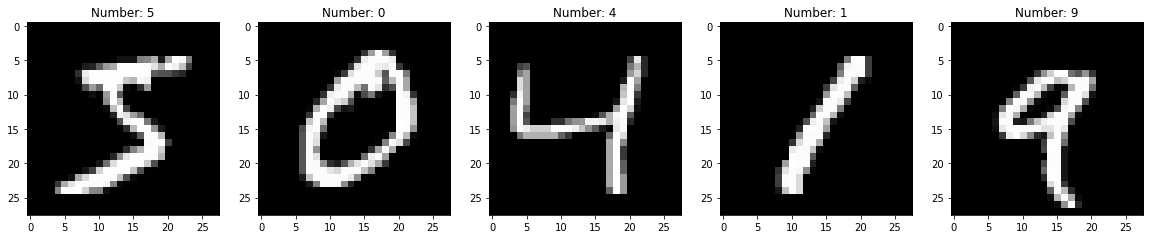

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Number: %s" % label)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [5]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9207857142857143
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
mdl.predict([X_test[0]])[0]

'3'

Prediction: 3


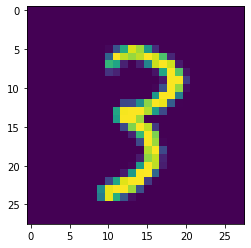

In [7]:
index = 3
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + mdl.predict([X_test[index]])[0])

In [8]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1344,    0,    9,    4,    4,    5,   16,    3,    6,    2],
       [   0, 1477,    4,    1,    1,    3,    1,    2,   12,    3],
       [  12,   17, 1263,   28,   14,    6,   18,   18,   35,    5],
       [   4,    8,   28, 1303,    0,   55,    6,   14,   16,   13],
       [   5,    5,   10,    4, 1291,    1,   18,    4,   13,   58],
       [  12,    9,    9,   54,   13, 1081,   17,    5,   40,   15],
       [  12,    3,   10,    0,    8,   22, 1309,    1,    3,    1],
       [   5,    3,   22,    7,   12,    1,    0, 1419,    2,   53],
       [  11,   26,   19,   27,    5,   41,   16,    8, 1164,   14],
       [   5,    4,    2,   35,   27,    6,    2,   24,    7, 1240]],
      dtype=int64)

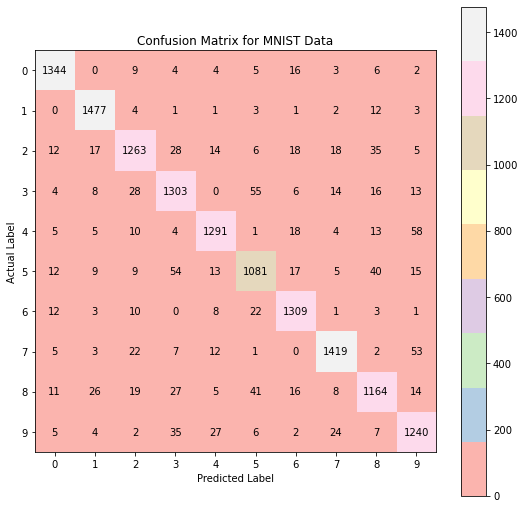

In [9]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')